In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [5]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [6]:
np.random.seed(1)

In [37]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = RandomForestClassifier(random_state=1234)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [38]:
X_pca = s01_pca[:,0:2]
y = Assignments

In [39]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.5134979565993207
Fold 2: 0.5139008806769124
Fold 3: 0.5090657917458125
Fold 4: 0.5130950325217292
Fold 5: 0.51208841814414
Mean Accuracy: 0.512329615937583
Accuracy SD: 0.0017395677658869247


### UMAP Accuracy

In [40]:
X_umap = s01_umap[:,0:2]
y = Assignments

In [41]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.7243423703447879
Fold 2: 0.7257238243251022
Fold 3: 0.7193921602486617
Fold 4: 0.7320554884015427
Fold 5: 0.7261685470872669
Mean Accuracy: 0.7255364780814724
Accuracy SD: 0.0040524224931188044


### tSNE Accuracy

In [42]:
X_tsne = s01_tsne[:,0:2]
y = Assignments

In [43]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.735969608012433
Fold 2: 0.7364300926725379
Fold 3: 0.731710124906464
Fold 4: 0.7382144707304438
Fold 5: 0.7387750402947272
Mean Accuracy: 0.7362198673233211
Accuracy SD: 0.0024880495474185744


### 2 Layer AE Accuracy

In [45]:
X_2layer = s01_2layer[:,0:2]
y = Assignments

In [46]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.4842571806826685
Fold 2: 0.49473320670005183
Fold 3: 0.4843147412651816
Fold 4: 0.48966787543889945
Fold 5: 0.4884296569191803
Mean Accuracy: 0.4882805322011963
Accuracy SD: 0.003885841551548684


### 6 Layer AE Accuracy

In [47]:
X_6layer = s01_6layer[:,0:2]
y = Assignments

In [48]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6508950670580786
Fold 2: 0.6549818684165084
Fold 3: 0.6526794451159845
Fold 4: 0.6603925631727393
Fold 5: 0.6561132857471794
Mean Accuracy: 0.6550124459020982
Accuracy SD: 0.003242040912949157


### VAE Accuracy

In [49]:
X_vae = s01_vae[:,0:2]
y = Assignments

In [50]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6705807862775571
Fold 2: 0.6781787831692857
Fold 3: 0.674091981810856
Fold 4: 0.6810568122949404
Fold 5: 0.6834561363113055
Mean Accuracy: 0.6774728999727889
Accuracy SD: 0.0046491645380261895


### Figure Generation

In [52]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

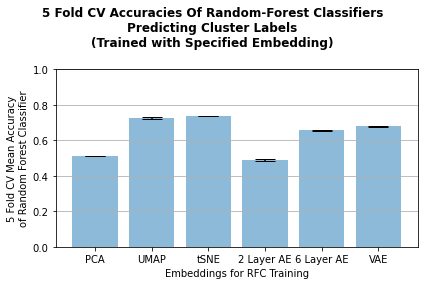

In [75]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof Random Forest Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of Random-Forest Classifiers\nPredicting Cluster Labels\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/RandomForestClassiferAccuracies.png')
plt.show()

In [ ]:
print(MEt)